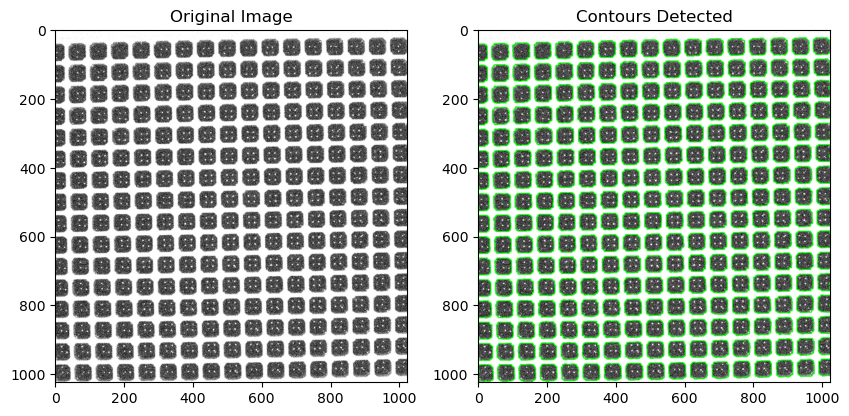

In [1]:
from PIL import Image, ImageEnhance
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Open a TIFF image file
image = Image.open('photograph 2.TIF')

# Convert the image to RGB
image = image.convert('RGB')

# Enhance the image contrast and brightness
enhancer_contrast = ImageEnhance.Contrast(image)
contrast_image = enhancer_contrast.enhance(8.0)  # Increase contrast

enhancer_brightness = ImageEnhance.Brightness(contrast_image)
bright_image = enhancer_brightness.enhance(1.0)  # Increase brightness

# Convert the PIL Image to a NumPy array
bright_image_np = np.array(bright_image)

# Convert the NumPy array to a format OpenCV understands
bright_image_cv = cv2.cvtColor(bright_image_np, cv2.COLOR_RGB2BGR)

# Save the brightened image using OpenCV
cv2.imwrite("mod_image.jpg", bright_image_cv)

# Load the image
image = cv2.imread("mod_image.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and smooth the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Perform morphological operations to enhance the wells
kernel = np.ones((5, 5), np.uint8)
morph = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_CLOSE, kernel)
morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)  # Adding opening to remove small noise

# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(morph, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours by area and circularity
min_area = 1000  # Adjust this value to filter out small contours
max_area = 3000  # Adjust this value to filter out large contours

filtered_contours = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if min_area < area < max_area:
        # Calculate circularity
        perimeter = cv2.arcLength(cnt, True)
        if perimeter == 0:  # Avoid division by zero
            continue
        circularity = 4 * np.pi * (area / (perimeter * perimeter))
        if 0.5 < circularity < 1.2:  # Circularity threshold, adjust if necessary
            filtered_contours.append(cnt)

# Draw the filtered contours on the original image
contour_color = (0, 255, 0)  # Change this value to adjust the contour color
contour_thickness = 2  # Change this value to adjust the contour thickness
image_with_contours = cv2.drawContours(image.copy(), filtered_contours, -1, contour_color, contour_thickness)

# Display the original image and the image with contours side by side
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB)), plt.title('Contours Detected')
plt.show()


In [7]:
from PIL import Image

# Open the two images
image1 = Image.open('mod_image1.jpg')
image2 = Image.open('mod_image.jpg')

# Get the dimensions of the images
width1, height1 = image1.size
width2, height2 = image2.size

# Decide the new dimensions for the combined image
# Here, we'll stick them side by side (horizontally)
new_width = width1 + width2
new_height = max(height1, height2)

# Create a new blank image with the new dimensions
new_image = Image.new('RGB', (new_width, new_height))


# Paste the first image onto the new image
new_image.paste(image1, (0, 0))

# Adjust the position of the second image
# Let's say we want to paste the second image 50 pixels right and 100 pixels down from the top left corner
x_offset = 0
y_offset = 100

# Paste the second image onto the new image at the specified position
new_image.paste(image2, (x_offset, y_offset))

# Save the new image
new_image.save('combined_image_with_offset.jpg')

In [12]:
from PIL import Image

# Open the two images
image1 = Image.open('mod_image1.jpg')
image2 = Image.open('mod_image.jpg')

# Get the dimensions of the images
width1, height1 = image1.size
width2, height2 = image2.size

# Decide the new dimensions for the combined image
# Here, we'll stick them one on top of the other with an offset
x_offset = 0  # no horizontal offset for vertical stitching
y_offset = 50

new_width = max(width1, width2 + x_offset)
from PIL import Image

# Open the two images
image1 = Image.open('path_to_image1.jpg')
image2 = Image.open('path_to_image2.jpg')

# Get the dimensions of the images
width1, height1 = image1.size
width2, height2 = image2.size

# Decide the new dimensions for the combined image
# Here, we'll stick them one on top of the other with an offset
x_offset = 0  # no horizontal offset for vertical stitching
y_offset = 50

new_width = max(width1, width2 + x_offset)
new_height = height1 + height2 + y_offset

# Create a new blank image with the new dimensions
new_image = Image.new('RGB', (new_width, new_height))

# Paste the images onto the new image
new_image.paste(image1, (0, 0))
new_image.paste(image2, (x_offset, height1 + y_offset))

# Save the new image
new_image.save('combined_image_vertical.jpg')


# Create a new blank image with the new dimensions
new_image = Image.new('RGB', (new_width, new_height))

# Paste the images onto the new image
new_image.paste(image1, (0, 0))
new_image.paste(image2, (x_offset, height1 + y_offset))

# Save the new image
new_image.save('combined_image2.jpg')


In [5]:
from PIL import Image

# Open the two images
image1 = Image.open('mod_image1.jpg')
image2 = Image.open('mod_image.jpg')

# Get the dimensions of the images
width1, height1 = image1.size
width2, height2 = image2.size


x_offset = 505
y_offset = 8

new_width = width1 + width2 + x_offset
new_height = max(height1, height2 - y_offset)


new_image = Image.new('RGB', (new_width, new_height))

# Paste the images onto the new image
new_image.paste(image1, (0+ x_offset, 0))
new_image.paste(image2, (width1 , y_offset))

# Save the new image
new_image.save('combined_image_horizontal_upward14.jpg')
